In [1]:
from PIL import Image
import os

In [2]:
from transformers import pipeline

In [3]:
checkpoint = "vinvino02/glpn-nyu"
depth_estimator = pipeline("depth-estimation", model=checkpoint)

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


In [4]:
seq_id = 1
frame = 1
root = '../cars/'
tripod = 'epfl-gims08/tripod-seq'
depth = 'depth'
path = 'epfl-gims08/tripod-seq/tripod_seq_{:02d}_{:03d}.jpg'
img = Image.open(os.path.join(root,path.format(seq_id, frame)))

In [5]:
all_cars = sorted(os.listdir(os.path.join(root, tripod)))

In [6]:
all_cars[0]

'tripod_seq_01_001.jpg'

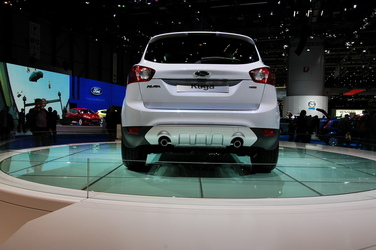

In [7]:
img = Image.open(os.path.join(root, tripod, all_cars[0]))
img

In [8]:
predictions = depth_estimator(img)

In [9]:
predictions["depth"].save(os.path.join(root, depth, all_cars[0]))

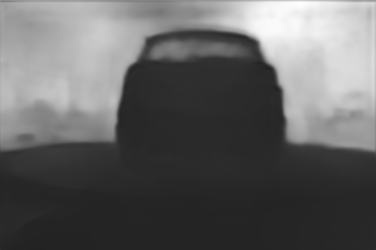

In [11]:
predictions["depth"]

In [12]:
predictions["predicted_depth"]

tensor([[[5.1179, 5.0833, 5.0558,  ..., 5.8864, 5.6966, 5.8074],
         [5.1100, 4.8209, 4.6583,  ..., 6.5765, 6.4483, 6.5472],
         [5.7847, 5.7995, 5.7999,  ..., 7.8989, 7.5866, 7.3695],
         ...,
         [1.4174, 1.4353, 1.4093,  ..., 1.4957, 1.5118, 1.4520],
         [1.4388, 1.3751, 1.4251,  ..., 1.4980, 1.5980, 1.4194],
         [1.5252, 1.4821, 1.3777,  ..., 1.5050, 1.5344, 1.6042]]])